In [2]:
import spacy

# Load spaCy models
nlp_en = spacy.load("en_core_web_sm")
nlp_ru = spacy.load("ru_core_news_sm")

def process_sentences(filename, nlp):
    """Tokenizes, Lemmatizes, and tags sentences from a file."""
    processed_data = []
    with open(filename, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                doc = nlp(line)
                sentence_data = [(token.lemma_, token.pos_) for token in doc]
                processed_data.append(sentence_data)
    return processed_data

# Process files
english_sentences = process_sentences("english.txt", nlp_en)
russian_sentences = process_sentences("russian.txt", nlp_ru)

#Save the processed data to a file.
def save_processed_sentences(data, filename):
    with open(filename, "w", encoding = "utf-8") as f:
        for sentence in data:
            f.write(str(sentence) + "\n")

save_processed_sentences(english_sentences, "english_tagged.txt")
save_processed_sentences(russian_sentences, "russian_tagged.txt")

print("Tokenization, Lemmatization and POS tagging complete.")

Tokenization, Lemmatization and POS tagging complete.


In [1]:
from lambeq import BobcatParser, SpacyTokeniser, AtomicType, IQPAnsatz, Rewriter

parser = BobcatParser(verbose="suppress")
tokeniser = SpacyTokeniser()
rewriter = Rewriter(['prepositional_phrase', 'determiner'])
def process_diagrams(sentences, diagrams):
    for sentence in sentences:
        try:
            #sentence = tokeniser.split_sentences(sentence) #for more complex sentences this will be needed, but breaks single sentence itterances
            tokens = tokeniser.tokenise_sentence(sentence)
            diagram = parser.sentence2diagram(tokens, tokenised=True)
            #rewrite rule for prepositional phrases
            rewritten_diagram = rewriter(diagram)
            #normalize diagram
            normalised_diagram = rewritten_diagram.normal_form() #explore more rewriting ideas
            diagrams.append(normalised_diagram)
        except Exception as e:
            print(f"Failed to parse: {sentence}")

english_diagrams = []
russian_diagrams = []
english_sentences = []
russian_sentences = []

try:
    with open("english.txt", "r", encoding="utf-8") as f:
        for line in f:
            english_sentences.append(line.strip())
except FileNotFoundError:
    print("Wrong file name")
except UnicodeDecodeError:
    print("missed utf-8 encoding")

# try:
#     with open("russian.txt", "r") as f:
#         for line in f:
#             russian_sentences.append(line.strip())
# except FileNotFoundError:
#     print("Error: 'russian.txt' not found.")
#
# russian_diagrams = process_diagrams(russian_sentences)

 
process_diagrams(english_sentences, english_diagrams)
#process_diagrams("russian.txt", russian_diagrams)


Failed to parse: Isn't that so?
Failed to parse: Isn't that so?
Failed to parse: Aren't you hot?
Failed to parse: Aren't you hot?
Failed to parse: Aren't you sad?
Failed to parse: Aren't you sad?
Failed to parse: Can't Tom swim?
Failed to parse: Can't you read?
Failed to parse: Can't you read?
Failed to parse: Can't you read?
Failed to parse: Can't you read?
Failed to parse: Can't you sing?
Failed to parse: Can't you sing?
Failed to parse: Can't you sing?
Failed to parse: Can't you sing?
Failed to parse: Can't you swim?
Failed to parse: Can't you swim?
Failed to parse: Didn't Tom cry?
Failed to parse: Didn't Tom win?
Failed to parse: Didn't Tom win?
Failed to parse: Don't you care?
Failed to parse: Don't you care?
Failed to parse: Don't you know?
Failed to parse: Don't you know?
Failed to parse: Don't you know?
Failed to parse: Don't you know?
Failed to parse: Isn't it black?
Failed to parse: Isn't it black?
Failed to parse: Isn't it black?
Failed to parse: Isn't it great?
Failed to pa

KeyboardInterrupt: 

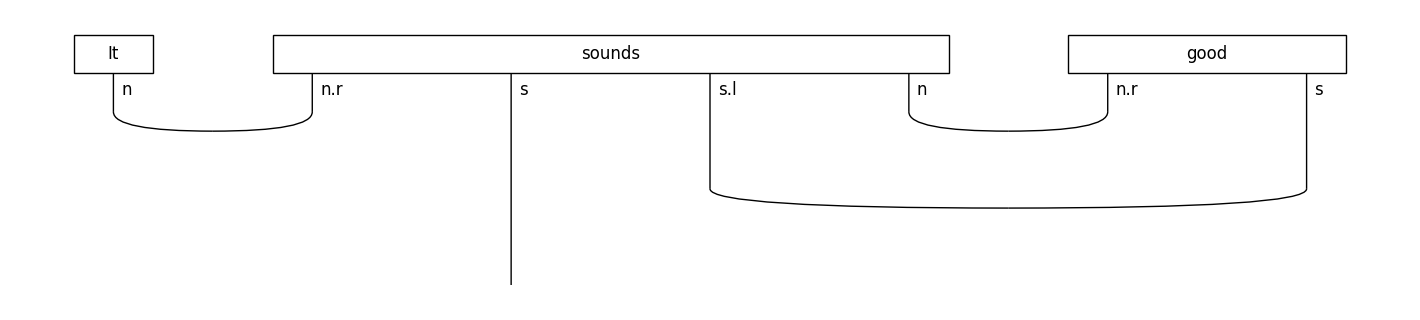

In [18]:
#append to file after every 20 diagrams
english_diagrams[15562].draw(figsize=(14,3), fontsize=12)

In [ ]:
from lambeq import AtomicType, IQPAnsatz
english_circuits = []
russian_circuits = []
def process_circuits(diagrams, circuits):
    #Define atomic types
    N = AtomicType.NOUN
    S = AtomicType.SENTENCE
    ansatz = IQPAnsatz({N:1, S:1}, n_layers=2, n_single_qubit_params=3)
    for diagram in diagrams:
    #Convert string Diagram to quantum circuit
        circuit = ansatz(diagram)
        circuits.append(circuit)
        
process_circuits(english_diagrams,english_circuits)
       


KeyError: Ty(p)

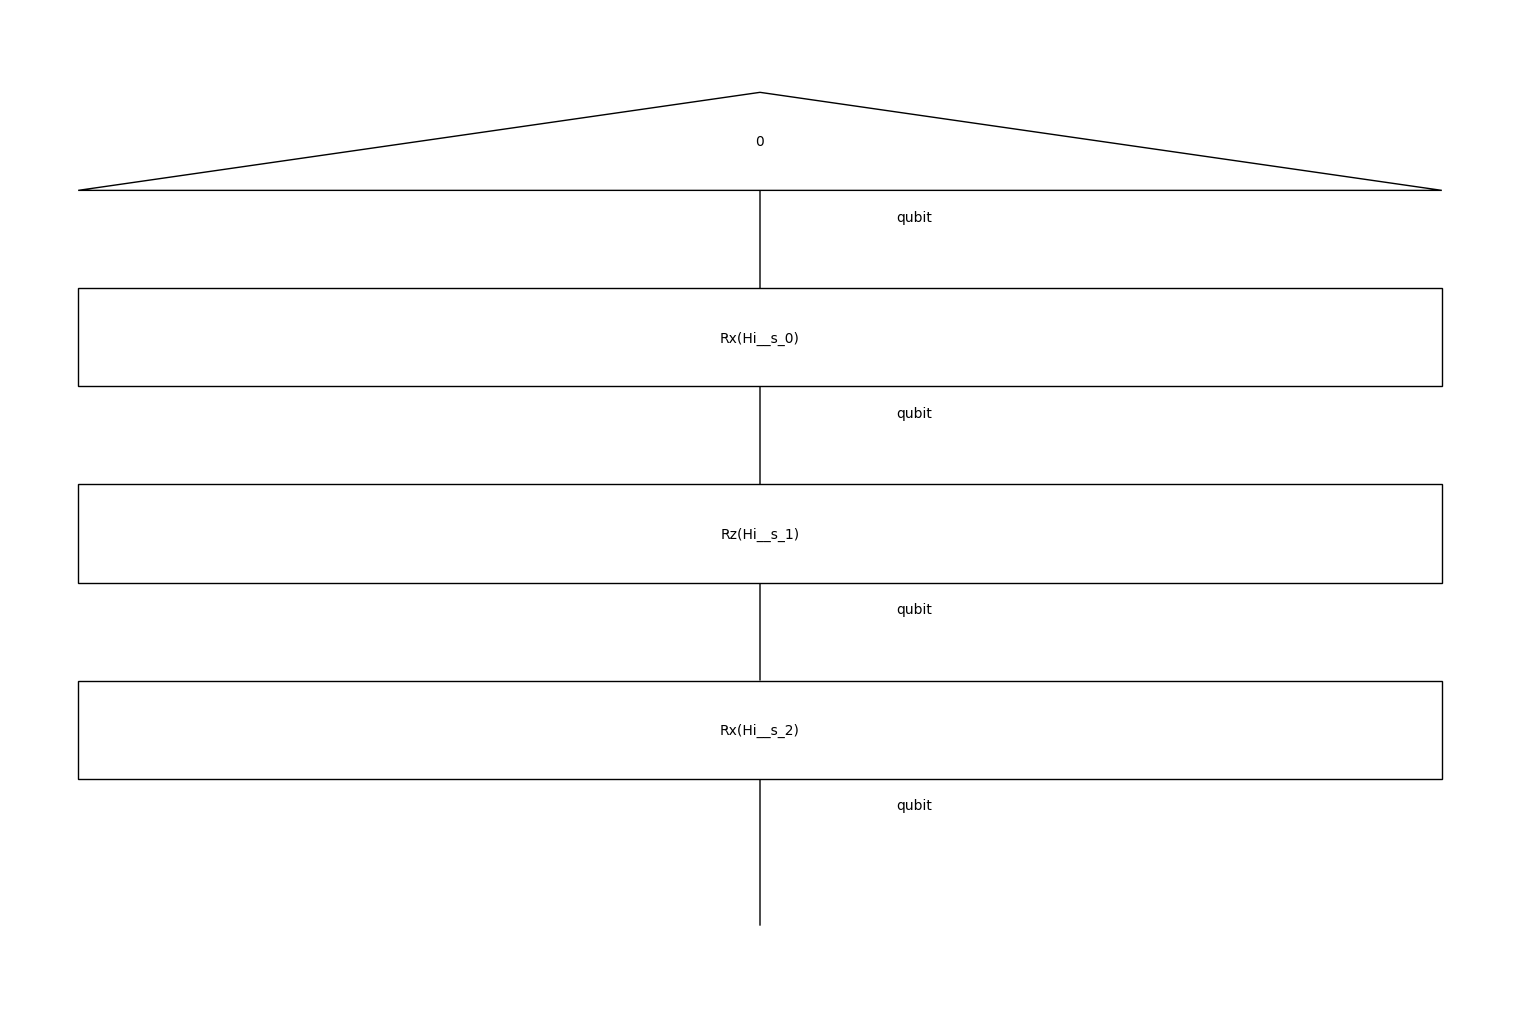

In [6]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE
ansatz = IQPAnsatz({N:1, S:1}, n_layers=2)
circuit = ansatz(parser.sentence2diagram("Hi"))
circuit.draw(figsize=(15,10))

In [7]:
BATCH_SIZE = 10
EPOCHS = 15
LEARNING_RATE = 0.1
SEED = 42
import torch
import random
import numpy as np
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)


In [ ]:
from lambeq import PennyLaneModel

all_circuits = russian_circuits + english_circuits

backend_config = {'backend': 'default.qubit'}
model = PennyLaneModel.from_diagrams(all_circuits, probabilities=True, normalize=True,backend_config=backend_config)
model.initialise_weights()

In [ ]:
import pennylane as qml
qml.default_config['qiskit.ibmq.ibmqx_token'] = 'my_API_token'
qml.default_config.save(qml.default_config.path)
backend_config = {'backend': 'qiskit.ibmq',
                  'device': 'ibmq_manilia',
                  'shots': 1000}
q_model = PennyLaneModel.from_diagrams(all_circuits, probabilities=True, normalize=True, backend_config=backend_config)
q_model = initialise_weights()

In [ ]:
def acc(y_hat, y):
    return (torch.argmax(y_hat, dim=1) ==
            torch.argmax(y, dim=1)).sum().item()/len(y)

def loss(y_hat, y):
    return torch.nn.functional.mse_loss(y_hat, y)

In [ ]:
from lambeq import PytorchTrainer

trainer = PytorchTrainer(
    model=model,
    loss_function=loss,
    optimizer=torch.optim.Adam,
    learning_rate=LEARNING_RATE,
    epochs=EPOCHS,
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    use_tensorboard=False,
    verbose='text',
    seed=SEED)

In [ ]:
trainer.fit(train_dataset, val_dataset)